## Build Models To Compare Features: Raw Original Features

### Read In Data

In [1]:
# Read in data
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
%matplotlib inline

train_features = pd.read_csv('../../../data/final_data/train_features_raw.csv')
train_labels = pd.read_csv('../../../data/final_data/train_labels.csv')

train_features.head()

Pclass  Sex  Age_clean  SibSp  Parch     Fare  Cabin  Embarked
0       2    1       62.0      0      0  10.5000    147         2
1       3    1        8.0      4      1  29.1250    147         1
2       3    1       32.0      0      0  56.4958    147         2
3       3    0       20.0      1      0   9.8250    147         2
4       2    0       28.0      0      0  13.0000    147         2

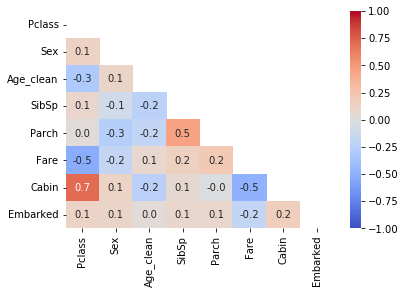

In [2]:
# Generate correlation matrix heat map
matrix = np.triu(train_features.corr())
sns.heatmap(train_features.corr(), annot=True, fmt='.1f', vmin=-1, vmax=1, center= 0, cmap='coolwarm', mask=matrix)

### GridSearchCV

In [3]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [4]:
# Conduct search for best params while running cross-validation (GridSearchCV)
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [2**i for i in range(3, 10)],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(train_features, train_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 8, 'n_estimators': 512}

0.787 (+/-0.09) for {'max_depth': 2, 'n_estimators': 8}
0.779 (+/-0.096) for {'max_depth': 2, 'n_estimators': 16}
0.79 (+/-0.119) for {'max_depth': 2, 'n_estimators': 32}
0.792 (+/-0.107) for {'max_depth': 2, 'n_estimators': 64}
0.796 (+/-0.102) for {'max_depth': 2, 'n_estimators': 128}
0.788 (+/-0.113) for {'max_depth': 2, 'n_estimators': 256}
0.794 (+/-0.107) for {'max_depth': 2, 'n_estimators': 512}
0.837 (+/-0.109) for {'max_depth': 4, 'n_estimators': 8}
0.817 (+/-0.107) for {'max_depth': 4, 'n_estimators': 16}
0.824 (+/-0.072) for {'max_depth': 4, 'n_estimators': 32}
0.828 (+/-0.113) for {'max_depth': 4, 'n_estimators': 64}
0.815 (+/-0.12) for {'max_depth': 4, 'n_estimators': 128}
0.817 (+/-0.108) for {'max_depth': 4, 'n_estimators': 256}
0.822 (+/-0.107) for {'max_depth': 4, 'n_estimators': 512}
0.82 (+/-0.058) for {'max_depth': 8, 'n_estimators': 8}
0.822 (+/-0.082) for {'max_depth': 8, 'n_estimators': 16}
0.832 (+/-0.048) for 

### Feature Importance

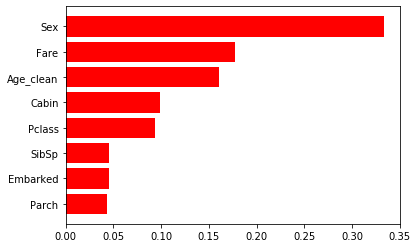

In [6]:
# Generate feature importance plot
feat_imp = cv.best_estimator_.feature_importances_
indices = np.argsort(feat_imp)
plt.yticks(range(len(indices)), [train_features.columns[i] for i in indices])
plt.barh(range(len(indices)), feat_imp[indices], color='r', align='center')
plt.show()

### Write Out Pickled Model

In [7]:
# Write out the model fit on the whole training set
joblib.dump(cv.best_estimator_, '../../../models/mdl_raw_original_features.pkl')

['../../../models/mdl_raw_original_features.pkl']

In [6]:
model = cv.best_estimator_

In [10]:
model.predict_proba(train_features).shape

(534, 2)

<BarContainer object of 10 artists>

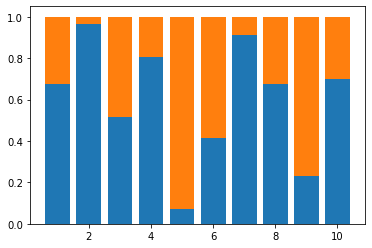

In [12]:
plt.bar(np.linspace(1,10,10),model.predict_proba(train_features)[0:10,0])
plt.bar(np.linspace(1,10,10),model.predict_proba(train_features)[0:10,1],bottom=model.predict_proba(train_features)[0:10,0])